24/10/09 18:31:39 WARN Utils: Your hostname, Brackens-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.168 instead (on interface en0)
24/10/09 18:31:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/10/09 18:31:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/09 18:31:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


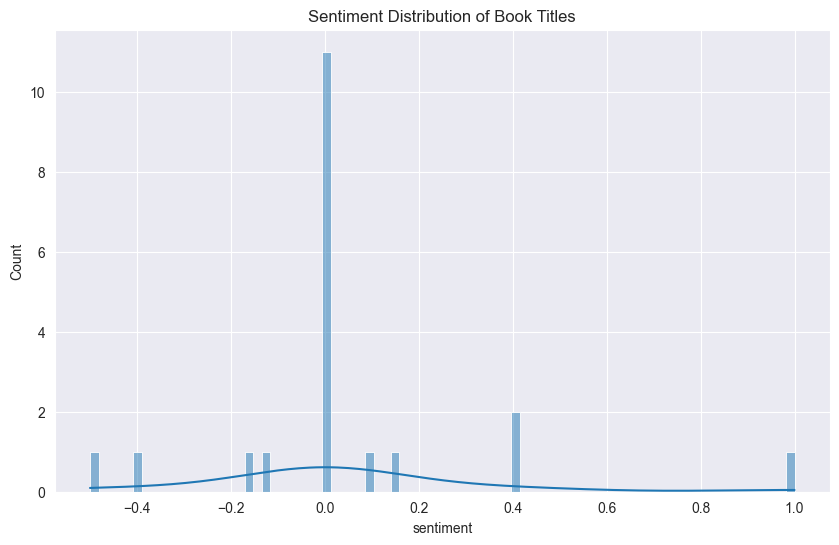

In [2]:
from textblob import TextBlob
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Sentiment Analysis").getOrCreate()

# Load the dataset
df = spark.read.csv("../data/output_books.csv", header=True, inferSchema=True)

# Convert Spark DataFrame to Pandas
pandas_df = df.toPandas()

# Perform sentiment analysis on titles
def get_sentiment(title):
    return TextBlob(title).sentiment.polarity

pandas_df['sentiment'] = pandas_df['title'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['sentiment'], kde=True)
plt.title('Sentiment Distribution of Book Titles')
plt.show()

spark.stop()
